In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Loading the Dataset:

Load your CSV file into a pandas DataFrame

In [3]:
# Load the dataset
data = pd.read_csv('customer_churn_data.csv')

In [ ]:
# Display the first few rows
print("Dataset Preview:")
print(data.head())

Dataset Preview:
  customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0   CUST0000    Male              0      No        Yes      23           No   
1   CUST0001  Female              0     Yes         No      43           No   
2   CUST0002    Male              1      No         No      51          Yes   
3   CUST0003    Male              1      No         No      72          Yes   
4   CUST0004    Male              1      No         No      25          Yes   

      MultipleLines InternetService       OnlineSecurity  ...  \
0  No phone service              No  No internet service  ...   
1  No phone service             DSL                  Yes  ...   
2                No             DSL                   No  ...   
3               Yes             DSL                  Yes  ...   
4               Yes             DSL                   No  ...   

      DeviceProtection          TechSupport          StreamingTV  \
0  No internet service  No internet service  No i

In [4]:
print(data.tail())

     customerID  gender  SeniorCitizen Partner Dependents  tenure  \
5875   CUST5875    Male              0     Yes        Yes      71   
5876   CUST5876    Male              0      No         No      22   
5877   CUST5877  Female              0      No         No      68   
5878   CUST5878  Female              0     Yes        Yes      14   
5879   CUST5879  Female              1     Yes         No      23   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
5875          Yes                No             DSL                  Yes  ...   
5876          Yes               Yes             DSL                   No  ...   
5877           No  No phone service     Fiber optic                  Yes  ...   
5878           No  No phone service     Fiber optic                  Yes  ...   
5879          Yes                No              No  No internet service  ...   

         DeviceProtection          TechSupport          StreamingTV  \
5875                   No  

Data Exploration:

Explore the dataset to understand its structure, types of variables, and any potential issues.


In [22]:
# Basic statistics
print("\nDataset Info:")
print(data.info())





Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5880 non-null   int64  
 1   gender            5880 non-null   int64  
 2   SeniorCitizen     5880 non-null   int64  
 3   Partner           5880 non-null   int64  
 4   Dependents        5880 non-null   int64  
 5   tenure            5880 non-null   int64  
 6   PhoneService      5880 non-null   int64  
 7   MultipleLines     5880 non-null   int64  
 8   InternetService   5880 non-null   int64  
 9   OnlineSecurity    5880 non-null   int64  
 10  OnlineBackup      5880 non-null   int64  
 11  DeviceProtection  5880 non-null   int64  
 12  TechSupport       5880 non-null   int64  
 13  StreamingTV       5880 non-null   int64  
 14  StreamingMovies   5880 non-null   int64  
 15  Contract          5880 non-null   int64  
 16  PaperlessBilling  5880 non-

In [6]:
print("\nSummary Statistics:")
print(data.describe())



Summary Statistics:
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    5880.000000  5880.000000     5880.000000   5880.000000
mean        0.500680    36.549150       70.157779   2566.813165
std         0.500042    20.909674       28.804615   1910.017743
min         0.000000     1.000000       20.000000     20.030000
25%         0.000000    18.000000       45.717500   1020.217500
50%         1.000000    37.000000       70.155000   2136.445000
75%         1.000000    55.000000       95.457500   3767.665000
max         1.000000    72.000000      119.990000   8589.600000


In [7]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [8]:
# Fill or drop missing values (if any)
data.fillna(method='ffill', inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_12876\3383380723.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


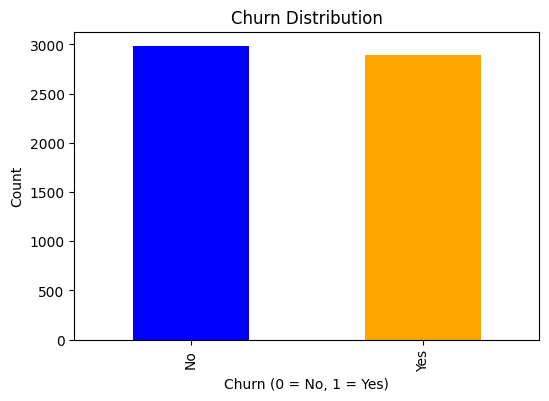

In [6]:
# Data distribution for target variable
plt.figure(figsize=(6, 4))
data['Churn'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

Data Preprocessing:

Handle missing values.
Encode categorical variables (e.g., gender, contract type).

In [9]:
# Convert categorical columns to numeric using Label Encoding
label_encoders = {}
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [5]:
print(data.head())

  customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0   CUST0000    Male              0      No        Yes      23           No   
1   CUST0001  Female              0     Yes         No      43           No   
2   CUST0002    Male              1      No         No      51          Yes   
3   CUST0003    Male              1      No         No      72          Yes   
4   CUST0004    Male              1      No         No      25          Yes   

      MultipleLines InternetService       OnlineSecurity  ...  \
0  No phone service              No  No internet service  ...   
1  No phone service             DSL                  Yes  ...   
2                No             DSL                   No  ...   
3               Yes             DSL                  Yes  ...   
4               Yes             DSL                   No  ...   

      DeviceProtection          TechSupport          StreamingTV  \
0  No internet service  No internet service  No internet service  

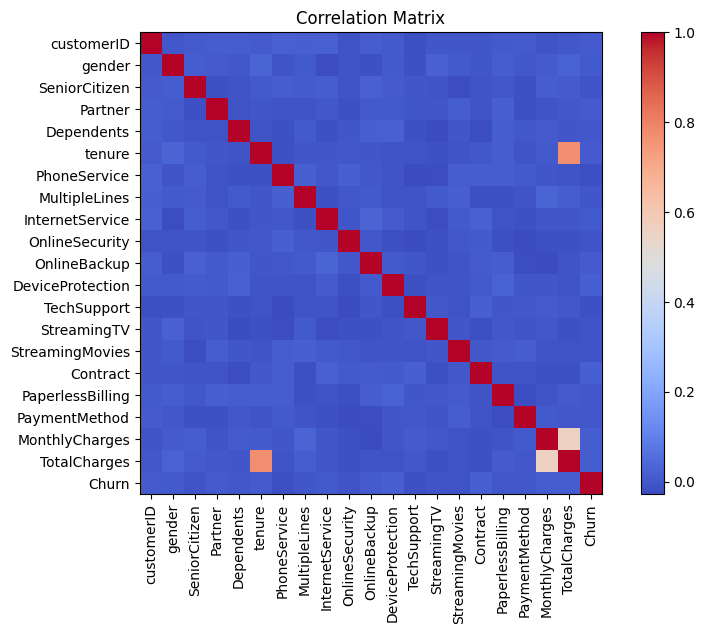

In [10]:
# Correlation matrix to see feature relationships
plt.figure(figsize=(10, 6))
plt.title("Correlation Matrix")
plt.imshow(data.corr(), cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(data.columns)), data.columns, rotation=90)
plt.yticks(range(len(data.columns)), data.columns)
plt.show()

Splitting the Dataset:

Split your dataset into features (X) and target variable (y).
Perform a train-test

In [8]:
# Split data into features (X) and target (y)
X = data.drop(['Churn'], axis=1)
y = data['Churn']


In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:
X_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
217,CUST0217,Male,0,Yes,No,53,No,No phone service,Fiber optic,Yes,No,No,No,Yes,No,One year,Yes,Mailed check,106.08,5622.24
2986,CUST2986,Female,0,No,Yes,40,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card,33.29,1331.60
5633,CUST5633,Female,0,Yes,Yes,33,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,28.15,928.95
360,CUST0360,Female,0,No,Yes,23,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Electronic check,82.38,1894.74
4287,CUST4287,Male,1,Yes,Yes,64,No,No phone service,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card,20.00,1280.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,CUST3772,Female,0,No,Yes,68,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,26.72,1816.96
5191,CUST5191,Female,1,No,Yes,1,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Electronic check,50.52,50.52
5226,CUST5226,Male,1,Yes,No,43,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,73.38,3155.34
5390,CUST5390,Female,1,Yes,No,39,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,48.47,1890.33


In [11]:
y_train

217      No
2986     No
5633     No
360     Yes
4287     No
       ... 
3772     No
5191     No
5226    Yes
5390    Yes
860      No
Name: Churn, Length: 4116, dtype: object

In [12]:
print(X_train.shape, X_test.shape)

(4116, 20) (1764, 20)


In [13]:
print(y_train.shape, y_test.shape)

(4116,) (1764,)


Training / Applying Classifiers:

You can train different classifiers (e.g., Logistic Regression, Random Forest, etc

In [14]:
# Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
print("Model trained successfully!")

Model trained successfully!


Testing & Processing Results:

After training, use the test set to evaluate model performance.

In [15]:
# Predictions
y_pred = model.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [17]:
print("\nModel Performance:")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)


Model Performance:
Accuracy: 0.50

Confusion Matrix:
[[526 348]
 [534 356]]


In [18]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.60      0.54       874
           1       0.51      0.40      0.45       890

    accuracy                           0.50      1764
   macro avg       0.50      0.50      0.50      1764
weighted avg       0.50      0.50      0.49      1764



Displaying Accuracies:

You can also visualize the accuracy or confusion matrix 
with plots to better understand the model performance.




In [19]:
# Feature importance visualization
importance = model.feature_importances_
indices = np.argsort(importance)[::-1]


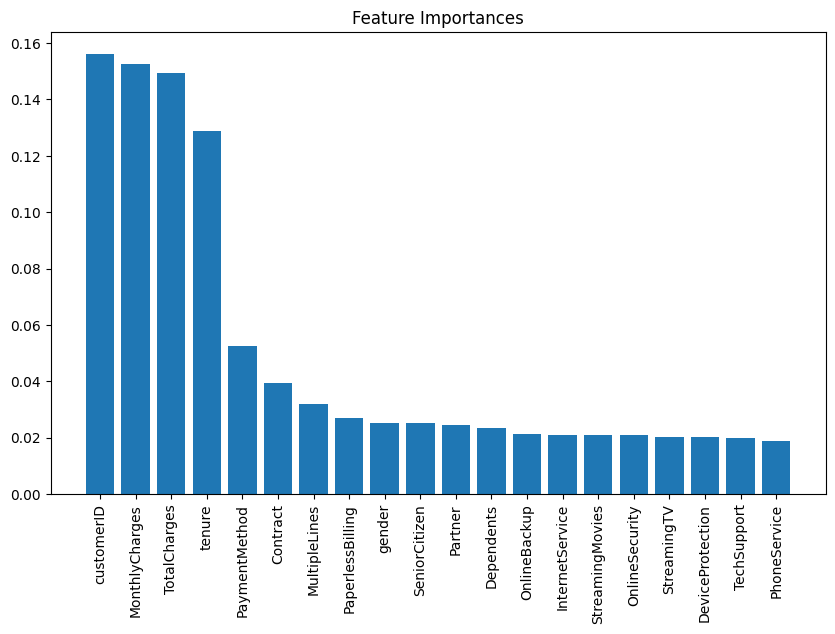

In [20]:
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importance[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title("Feature Importances")
plt.show()


In [16]:
features = X.columns

In [17]:
features

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

APPlication Phase:

Complete Workflow Example:



In [24]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [25]:
# Load dataset (replace with your own data)
data = load_iris()
X, y = data.data, data.target


In [26]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [28]:
# Test model
y_pred = model.predict(X_test)

In [29]:
# Display results
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [30]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [31]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%


In [32]:
# Application phase
new_data = [[5.1, 3.5, 1.4, 0.2]]  # Example input

In [33]:
print(f"Prediction for new data: {model.predict(new_data)}")

Prediction for new data: [0]
